# Tarea Isabel Gallego - Simon Londoño

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Vamos a trabajar con el mismo dataset de la tarea anterior.

Hacer un pairplot de las variables numéricas exceptuando Rank y Sourceid.

¿Qué se puede decir de las distribuciones de estas variables?

¿Qué se puede decir de las scatterplots de estas variables?

¿Hay muchos outliers?

¿Con qué variable parece que tiene mayor relación lineal la variable "Total Cites (3years)"?

In [18]:
df = pd.read_csv('Neuroscience.csv', sep=';')
df.head()

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2022),Total Docs. (3years),...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories,Areas
0,1,17436,Nature Neuroscience,journal,"10976256, 15461726","12,124",Q1,460,230,631,...,12318,568,"17,65","46,02",United Kingdom,Western Europe,Nature Publishing Group,1998-2022,Neuroscience (miscellaneous) (Q1),Neuroscience
1,2,14181,Annual Review of Neuroscience,journal,"0147006X, 15454126","8,389",Q1,256,27,72,...,1166,72,"14,22","151,37",United States,Northern America,Annual Reviews Inc.,1978-2022,Neuroscience (miscellaneous) (Q1),Neuroscience
2,3,21100356804,"Lancet Psychiatry,The",journal,"22150374, 22150366","8,167",Q1,127,255,941,...,11027,317,"14,05","18,00",United Kingdom,Western Europe,Elsevier Ltd.,2014-2022,Biological Psychiatry (Q1); Psychiatry and Men...,Medicine; Neuroscience
3,4,17978,Neuron,journal,"10974199, 08966273","7,736",Q1,511,378,1263,...,14680,1120,"10,37","66,93",United States,Northern America,Cell Press,1988-2022,Neuroscience (miscellaneous) (Q1),Neuroscience
4,5,17437,Nature Reviews Neuroscience,journal,"14710048, 1471003X","6,970",Q1,455,118,434,...,5120,291,"10,42","83,71",United Kingdom,Western Europe,Nature Publishing Group,2000-2022,Neuroscience (miscellaneous) (Q1),Neuroscience


In [19]:
df['SJR'] = df['SJR'].str.replace(',', '.').astype(float)
df['Cites / Doc. (2years)'] = df['Cites / Doc. (2years)'].str.replace(',', '.').astype(float)
df['Ref. / Doc.'] = df['Ref. / Doc.'].str.replace(',', '.').astype(float)

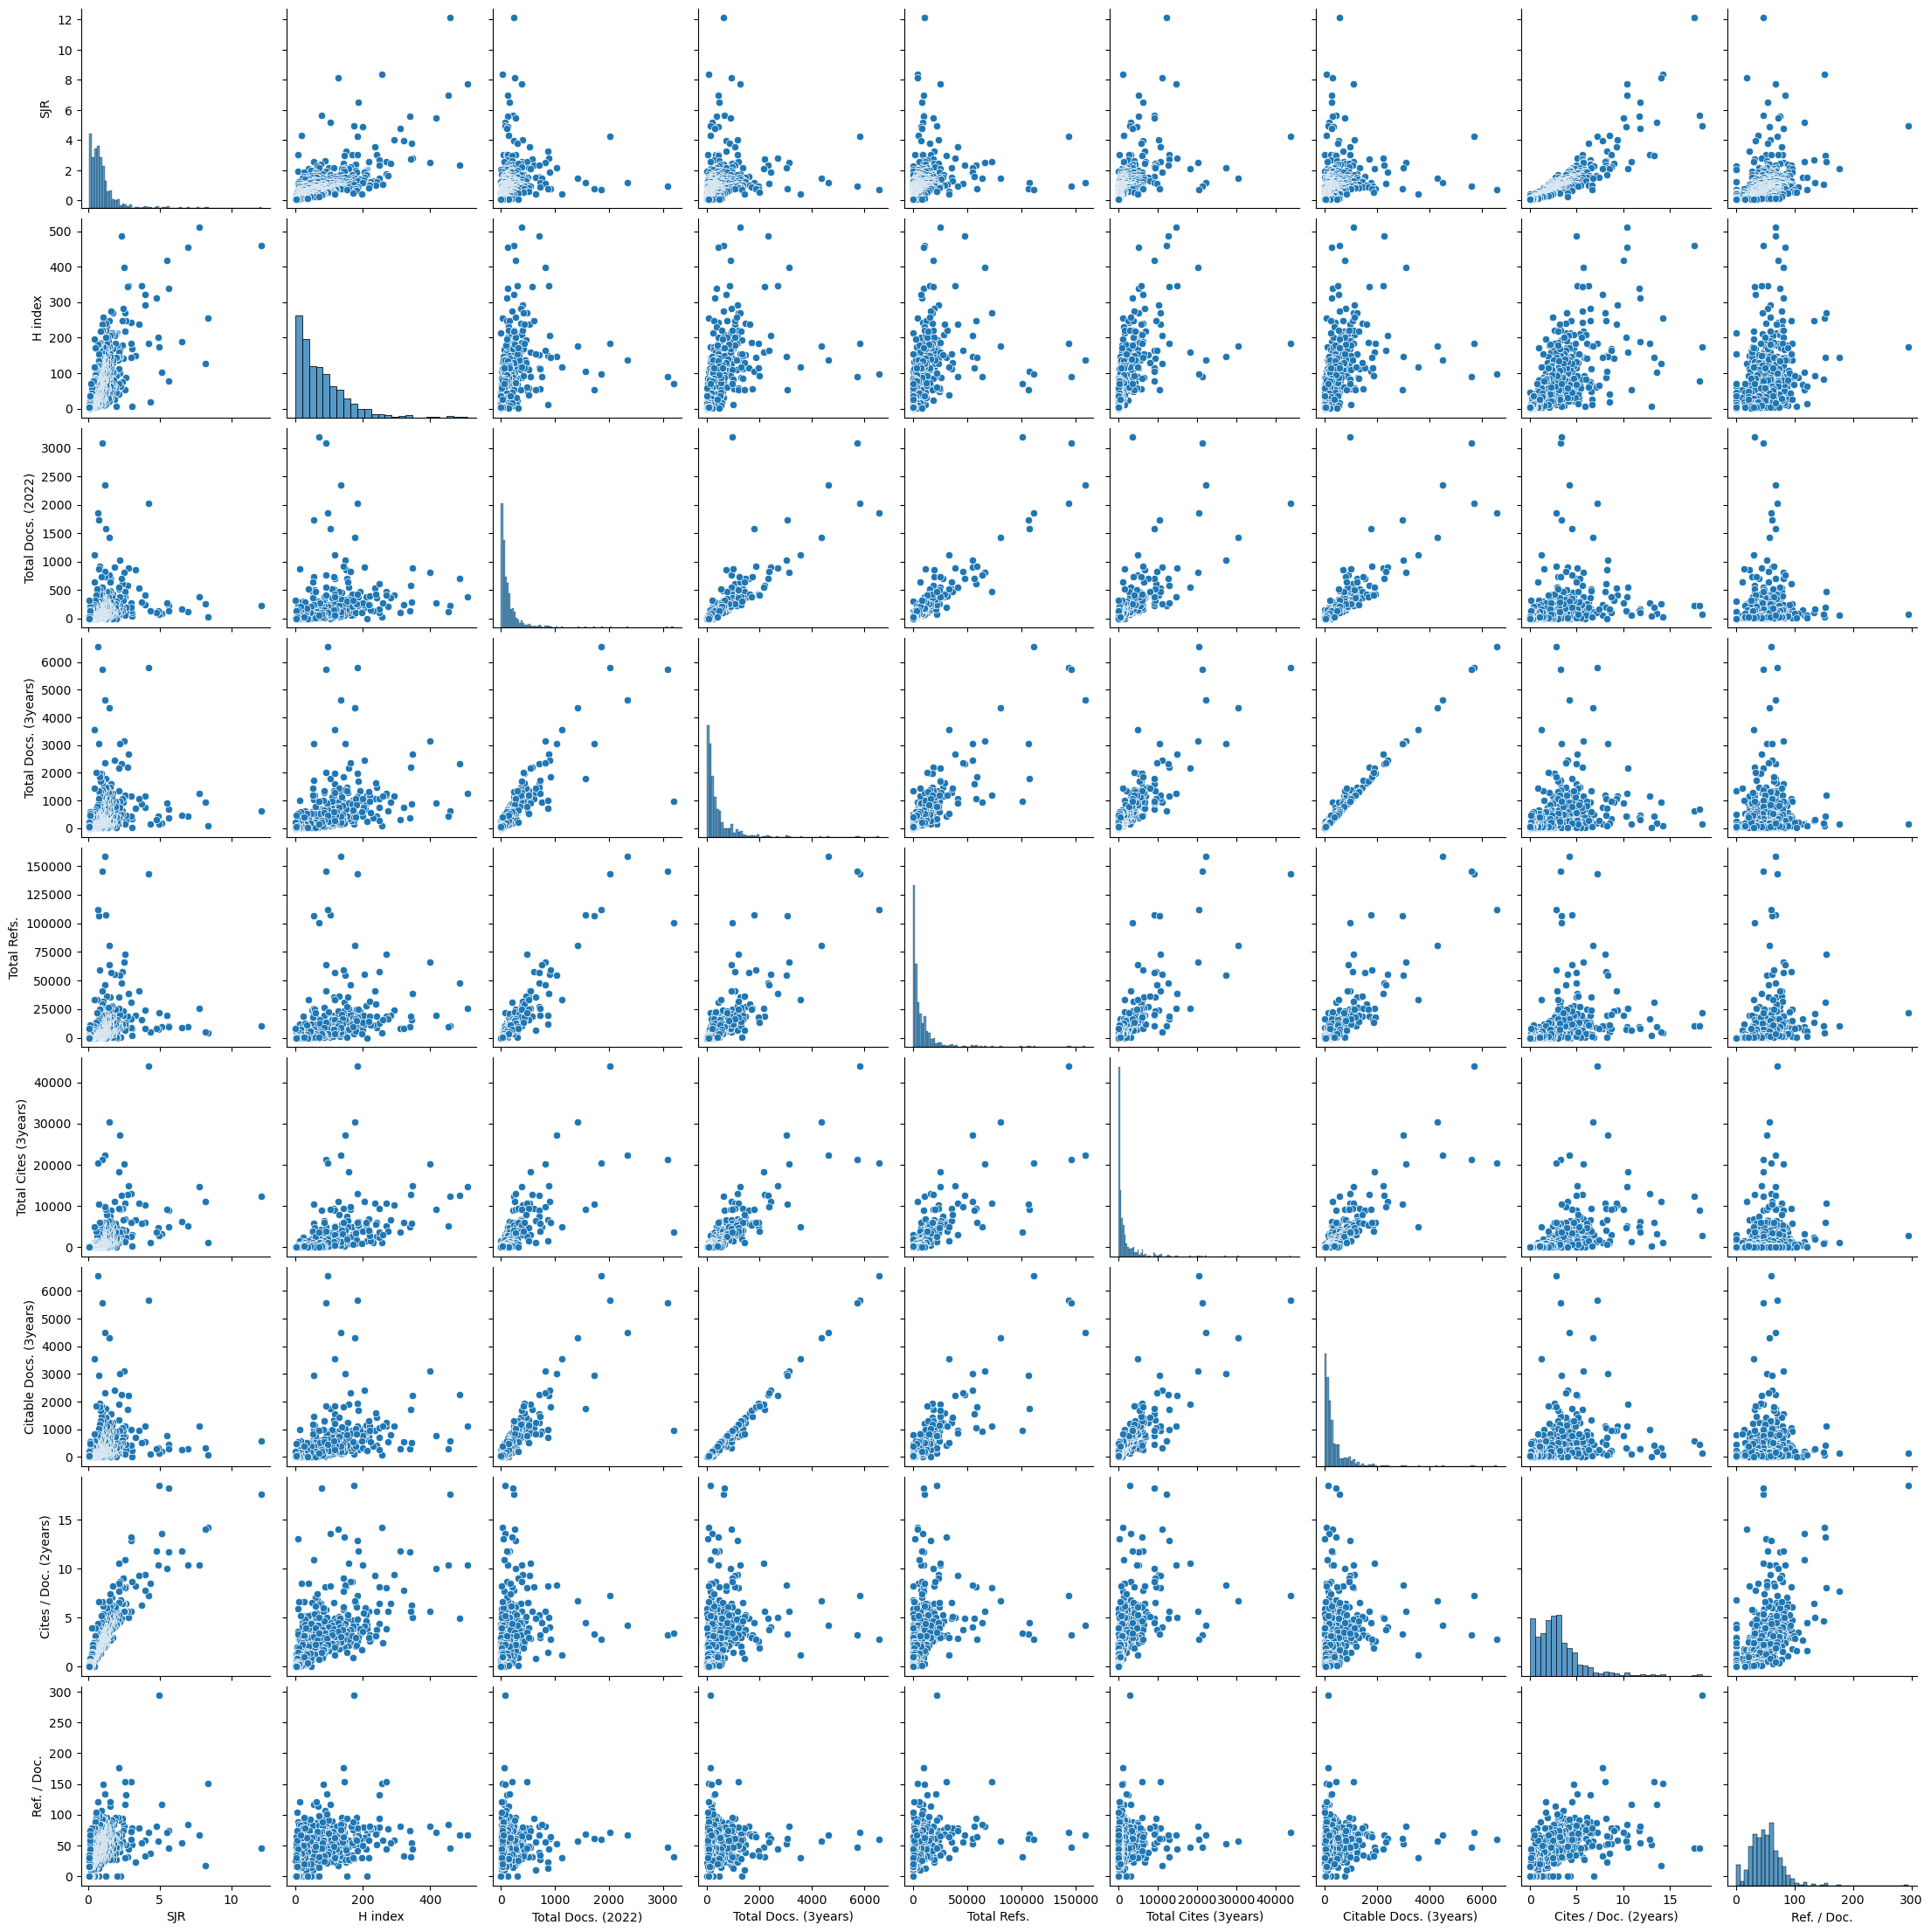

In [20]:
numeric_vars = ['SJR', 'H index', 'Total Docs. (2022)', 'Total Docs. (3years)', 'Total Refs.', 
                'Total Cites (3years)', 'Citable Docs. (3years)', 'Cites / Doc. (2years)', 
                'Ref. / Doc.']

sns.pairplot(df[numeric_vars])


En las distribuciones se puede observar una concentracion de los datos mayormente en los valores mas bajos

Respecto a los scatterplots, se puede obvervar que algunas variables tienen correlacion medianamente lineal 

Si tienen muchos outliers, en los valores altos

Esa variable parece tener mayor relacion con la variable total docs 3 years

Se puede ver que todas estas variables tienden a tener muchos valores atípicos altos. Cuando una variable se distribuye así, se dice que tiene colas pesadas (*heavy tails*). Esto puede ser muy problemático para haer análisis estadísticos. Una opción para resolver este problema sería eliminar los valores atípicos o *outliers*, pero esto podría llevar a perder muchos registros. Otra alternativa, muchas veces preferible, es generar nuevas variables calculando el logaritmo de las variables originales. En general, estas nuevas variables se acercan mucho más a distribuirse de manera normal.

Teniendo en cuenta lo anterior, ahora genere un nuevo dataframe en el que a todas las variables numéricas se les saca el logaritmo natural, exceptuando Rank y Sourceid.

Hacer nuevamente un pairplot de las variables numéricas exceptuando Rank y Sourceid.

¿Qué se puede decir de las distribuciones de estas variables?

¿Qué se puede decir de las scatterplots de estas variables?

¿Hay muchos outliers?

¿Con qué variable parece que tiene mayor relación lineal la variable "Total Cites (3years)"?

C:\Users\londo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


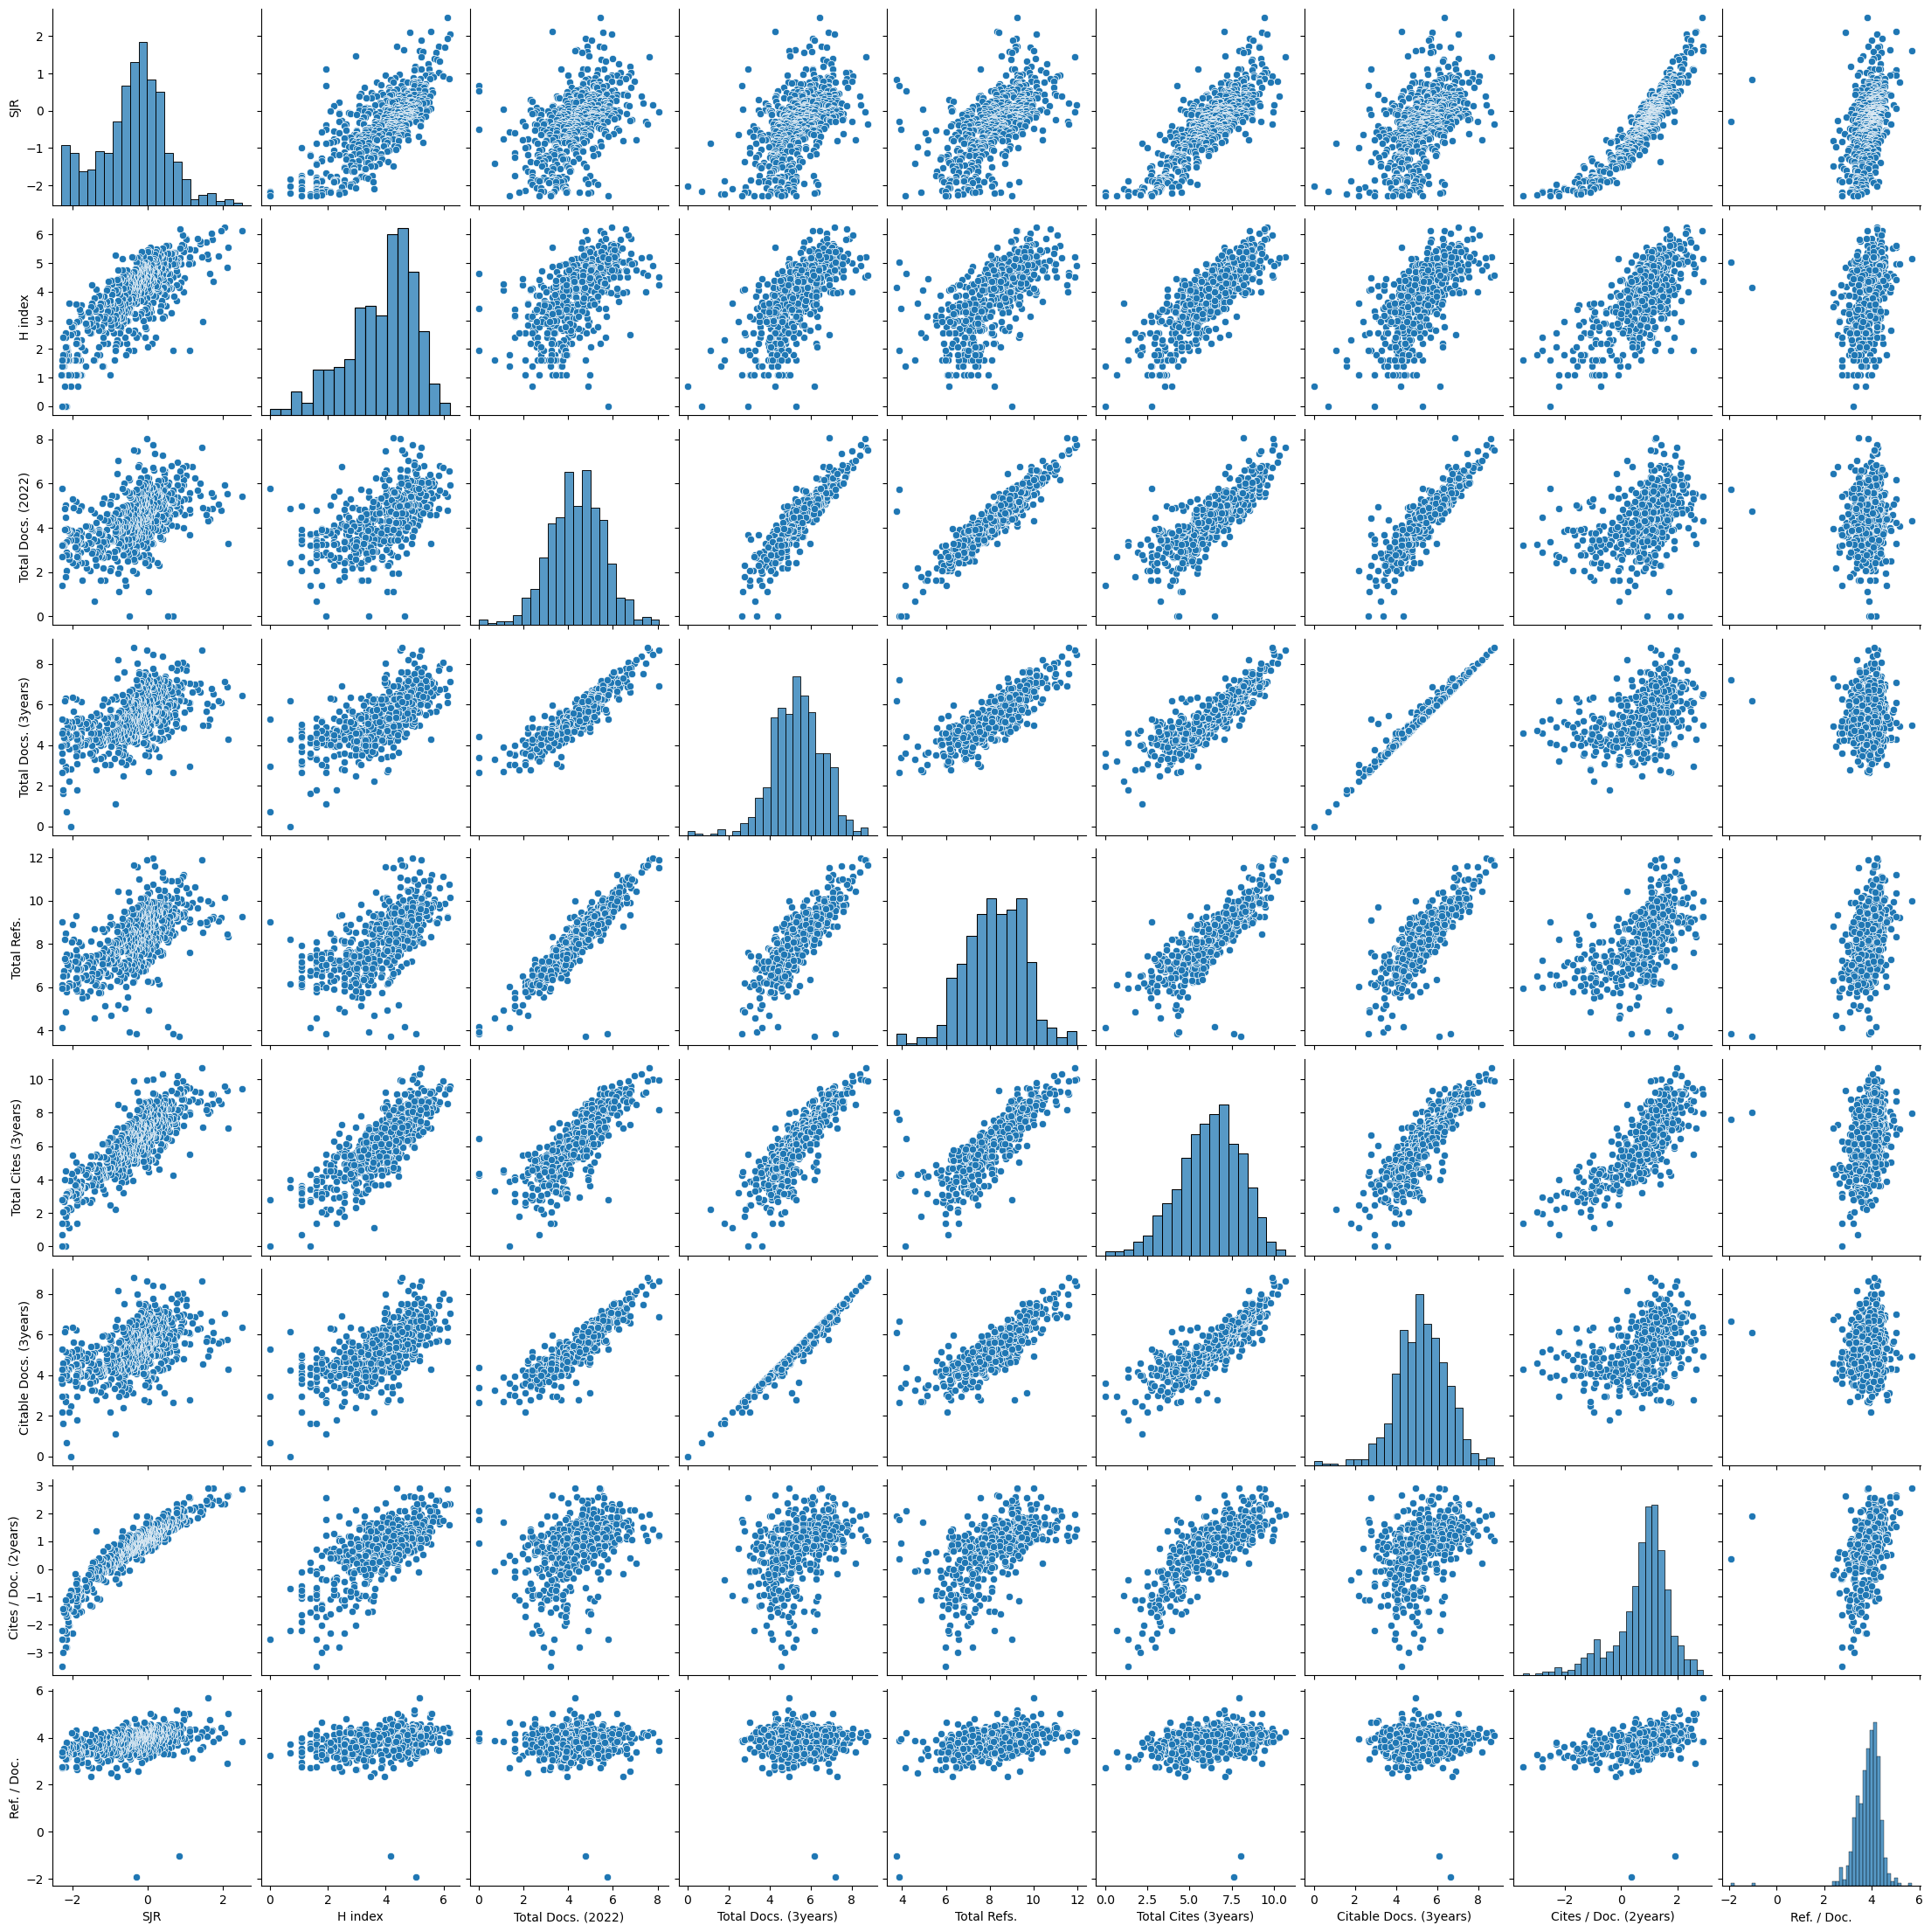

In [21]:
import numpy as np

df_log = df.copy()

for column in df_log.columns:
    if df_log[column].dtype in ['int64', 'float64']: 
        df_log[column] = np.log(df_log[column])

sns.pairplot(df_log[numeric_vars])

Las distribuciones son normales, en su mayoría

Respecto a los scatterplots, tienen una relacion lineal por lo que se puede observar 

Casi no se aprecian outliers

DE nuevo tiene mas relacion con total docs 3 years, debido a que tiene menos outliers

Va a explorar con un poco más de detalle algunas relaciones entre variables en este segundo dataframe (el de los logaritmos).

Haga jointplots de las variable obtenida de "Total Docs. (3years) vrsus las obtenidas de "Total Cites (3years)", "H index" y "SJR".

Analice los gráficos obtenidos, es decir, indique que información relevante o *insights* puede obtener de estos gráficos.

¿En cual caso parece que la relación es más lineal?


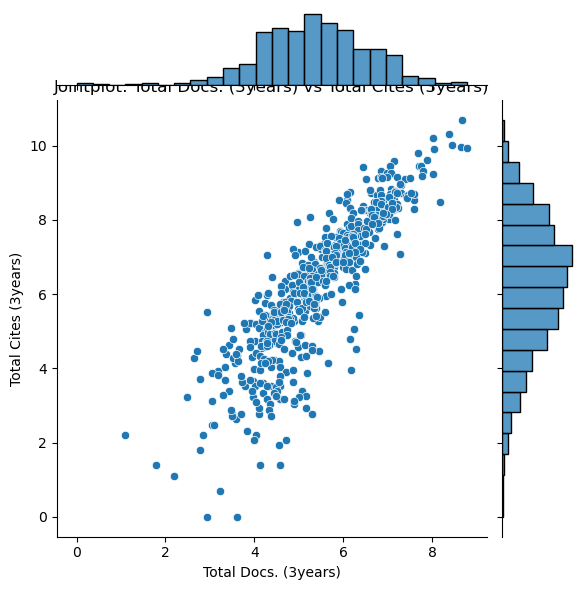

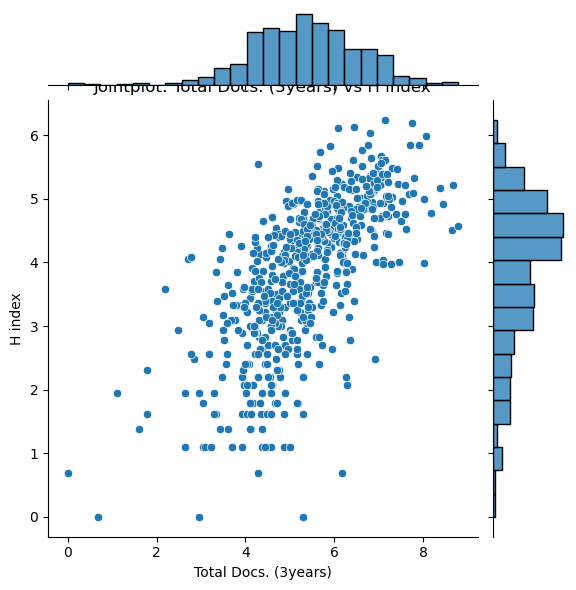

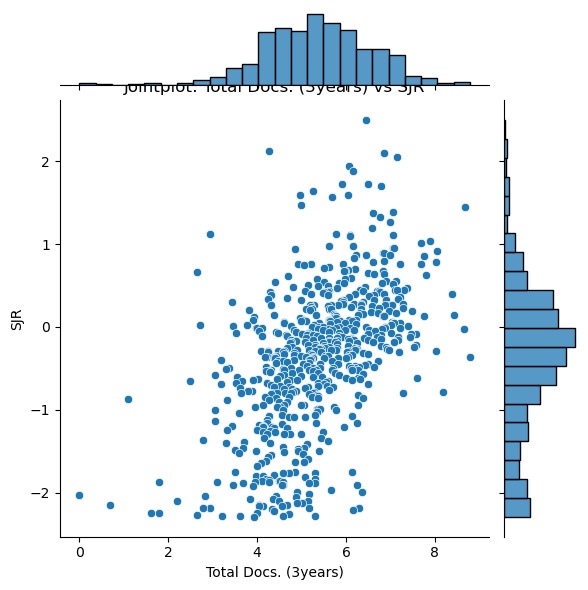

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x="Total Docs. (3years)", y="Total Cites (3years)", data=df_log, kind="scatter")
plt.title("Jointplot: Total Docs. (3years) vs Total Cites (3years)")
plt.show()

sns.jointplot(x="Total Docs. (3years)", y="H index", data=df_log, kind="scatter")
plt.title("Jointplot: Total Docs. (3years) vs H index")
plt.show()

sns.jointplot(x="Total Docs. (3years)", y="SJR", data=df_log, kind="scatter")
plt.title("Jointplot: Total Docs. (3years) vs SJR")
plt.show()


El grafico numero 2 y 3 parecen ser mas dispersos, tienen una correlacion clara 

El aprecia una relacion mas lineal en el primer grafico 

Ahora, haga un nuevo jointplot de "Total Docs. (3years)" versus "Total Cites (3years)", pero esta vez separando por "SJR Best Quartile".

Analice el gráfico obtenido, es decir, indique que información relevante o *insights* puede obtener de este gráfico.

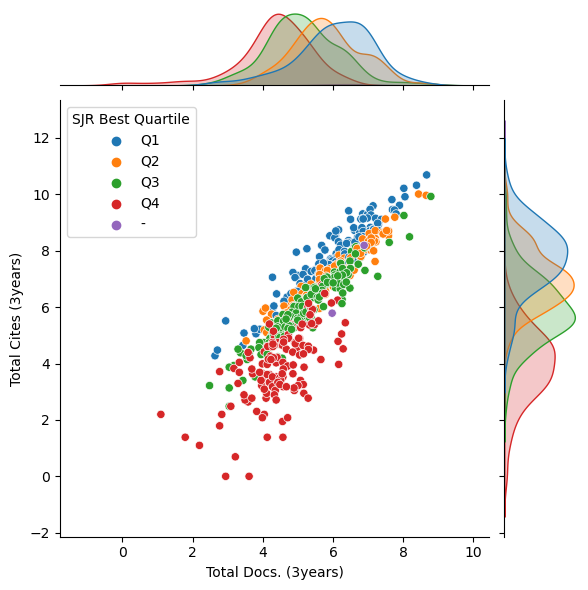

In [23]:
sns.jointplot(data=df_log, x='Total Docs. (3years)', y='Total Cites (3years)', hue='SJR Best Quartile')

Se puede obvervar que cada cuartil tiene una distribucion lineal, especial el cuartil numero 2

exepto el cuartil numero 4, este es mas disperso

Haga boxplots de las nuevas variables obtenidas de "Cites / Doc. (2years)", "H index", "Total Docs. (3years)" y "SJR" agrupadas por "SJR Best Quartile".

Analice los gráficos.

C:\Users\londo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\londo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\londo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


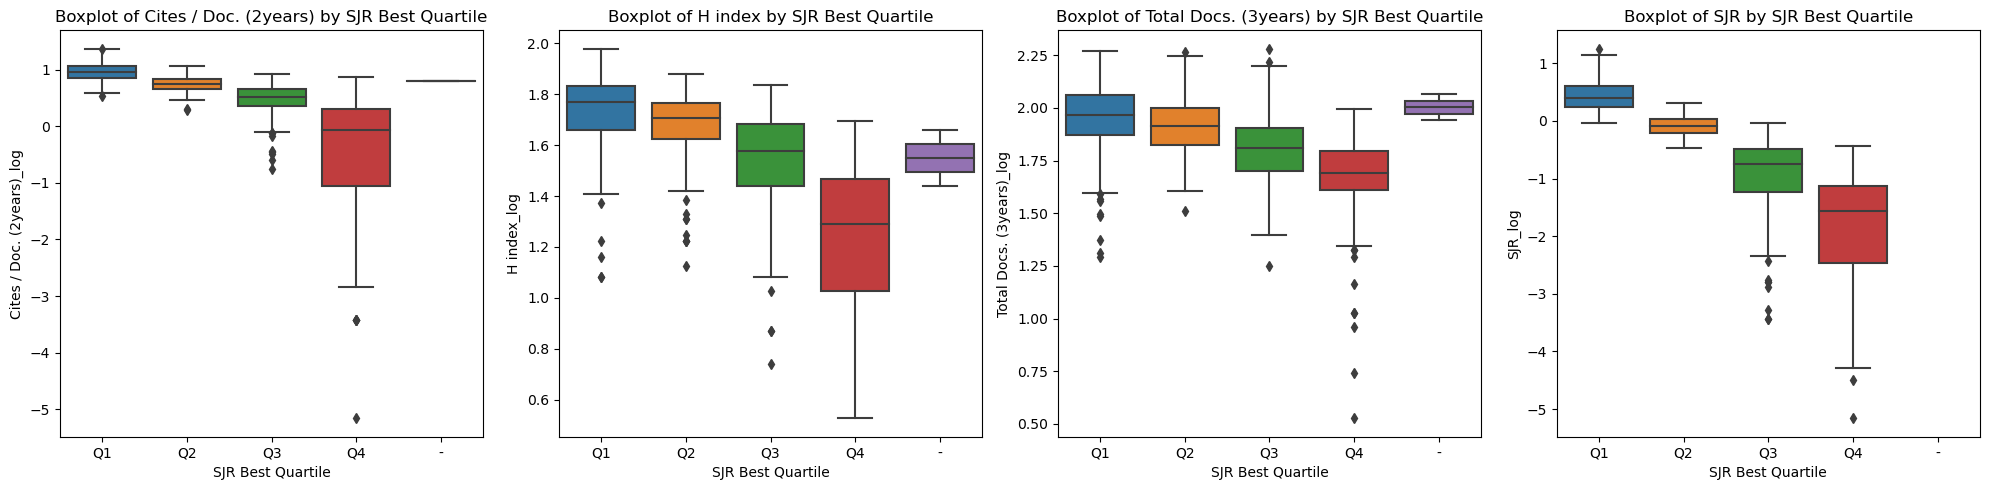

In [25]:
variables_to_plot = ['Cites / Doc. (2years)', 'H index', 'Total Docs. (3years)', 'SJR']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, var in enumerate(variables_to_plot):
    df_log[var + '_log'] = np.log1p(df_log[var].replace(0, np.nan).dropna().astype(float))
    sns.boxplot(x='SJR Best Quartile', y=var + '_log', data=df_log, ax=axs[i])
    axs[i].set_title(f'Boxplot of {var} by SJR Best Quartile')

plt.tight_layout()
plt.show()

En la unica variable donde el cuartil 4 no tiene outliers en es H index
Q1 tiene los valores mas altos para todas las variables

Haga boxplots de las nuevas variables obtenidas de "Cites / Doc. (2years)", "H index", "Total Docs. (3years)" y "SJR" agrupadas por "Region", pero únicamente para las regiones con más de 20 revistas.

Analice los gráficos.

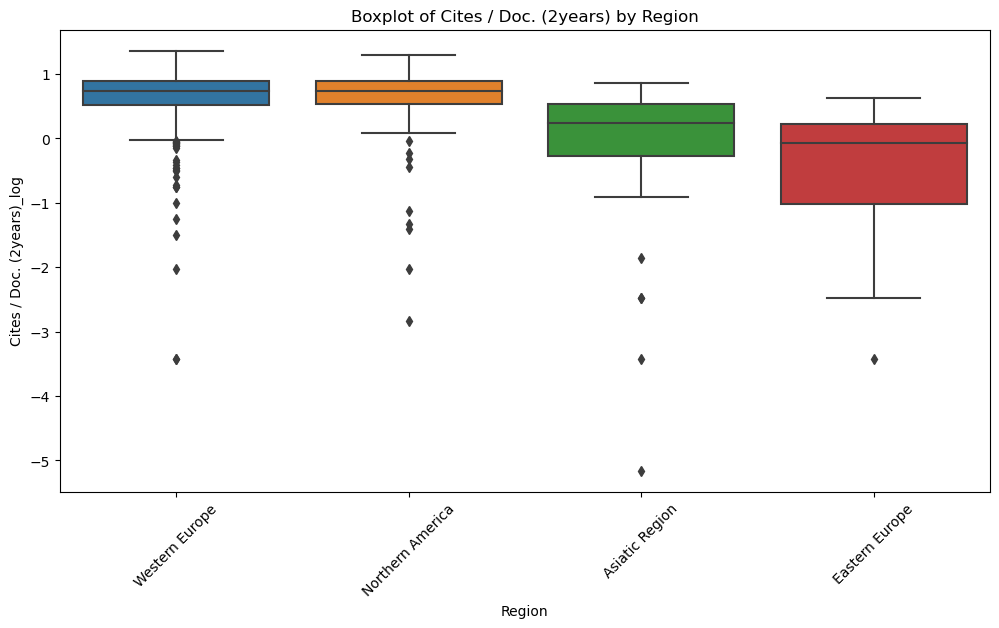

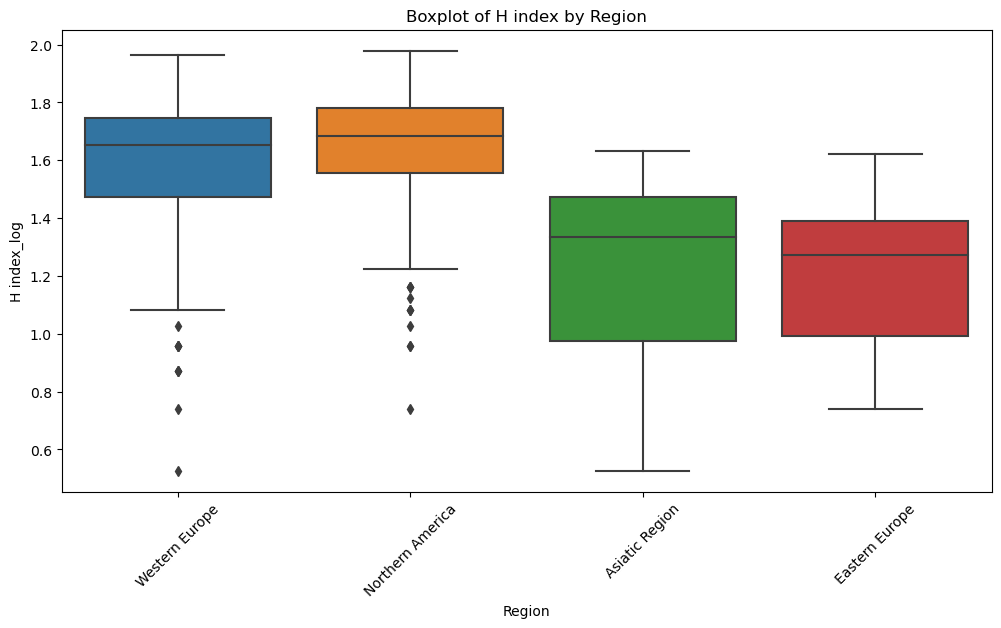

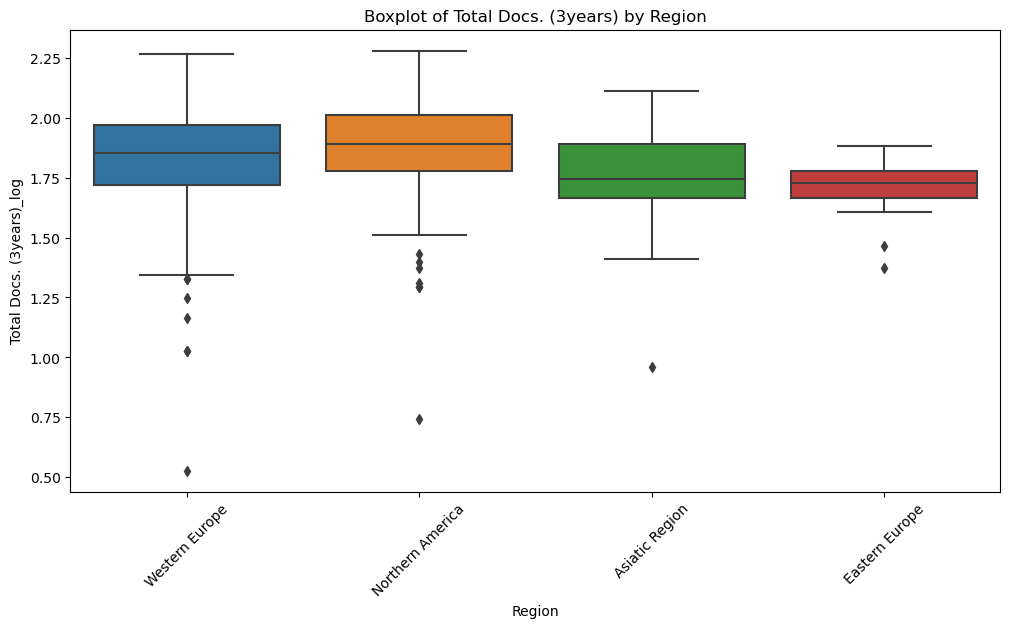

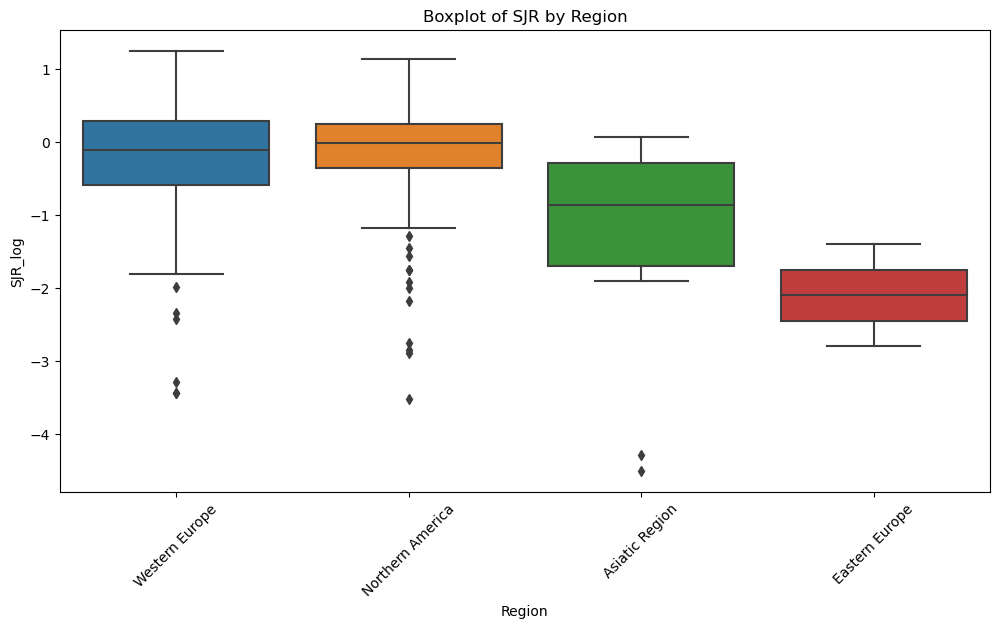

In [26]:
region_counts = df['Region'].value_counts()
regions_to_keep = region_counts[region_counts > 20].index

df_log_filtered = df_log[df_log['Region'].isin(regions_to_keep)]

variables = ['Cites / Doc. (2years)', 'H index', 'Total Docs. (3years)', 'SJR']

for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_log_filtered, x='Region', y=f'{variable}_log')
    plt.title(f'Boxplot of {variable} by Region')
    plt.xticks(rotation=45)
    plt.show()


Los gráficos muestran que hay diferencias notables entre las regiones en cuanto a la cantidad de citas por documento (Cites / Doc. (2years)), el índice H (H index), el número total de documentos publicados en 3 años (Total Docs. (3years)) y el SJR (una medida de la calidad de las revistas científicas).

Por ejemplo, las revistas de América del Norte tienden a tener los valores más altos en estas métricas, lo que sugiere que están más influyentes en su campo y tienen una mayor calidad de investigación en comparación con las revistas de otras regiones. Por otro lado, las revistas de América Latina muestran valores más bajos en estas métricas, lo que indica que pueden tener menos impacto y menor calidad en términos de investigación.

También se observa la presencia de algunos valores atípicos (outliers) en los datos. Estos valores atípicos pueden representar revistas que son excepcionalmente influyentes en su campo, lo que puede explicar por qué tienen valores extremadamente altos en algunas métricas. Por otro lado, también podrían ser revistas con un número muy bajo de documentos, pero que son muy citadas en comparación con su tamaño, lo que también los clasifica como valores atípicos.